# Fitting Physical Models to Data 

## The Likelihood Function 

Suppose a probablity distribution for a random variable $x$ is parameterized by a set of parameters $\boldsymbol{\theta}$, $P(x|\boldsymbol{\theta})$. Up until now, when discussing probability distributions we have been assuming that the parameter(s), $\boldsymbol{\theta}$, are known and fixed, and that $P(x |\boldsymbol{\theta})$ gives the probability that specific values of $x$ will occur. As a concrete example, consider the normal distribution $\mathcal{N}(x |\mu, \sigma)$ where $\boldsymbol{\theta} = (\mu, \sigma)$, would represent the mean and standard deviation of the distribution. Now let us assume that the $\boldsymbol{\theta}$ parameters are not known. Instead, we are given a set of samples (i.e. measurements!) of $x$, and we wish to infer $\boldsymbol{\theta}$ from these samples. 

Let the measured value of $x$ be denoted by ${\hat x}$. If we evaluate the probability distribution at ${\hat x}$, then we define the likelihood function 
as
$$
L({\hat x}|\boldsymbol{\theta}) = P({\hat x}|\boldsymbol{\theta}). 
$$
Now in the expression above, ${\hat x}$ is a known fixed quantity (not a random variable), the elements of $\boldsymbol{\theta}$ are now the variables
of interest, which are the independent variables of the likelihood function. 


## The Maximum Likelihood Principle

Given data points ${\hat x}$ drawn from a probability distribution $P(x|\boldsymbol{\theta})$, the **maximum likelihood principle states** that the best estimate of the parameters $\boldsymbol{\theta}$ are those which
maximize the likelihood function
$$
L({\hat x}|\boldsymbol{\theta}) = P({\hat x}|\boldsymbol{\theta}).
$$

### Example: Single Draw from a Gaussian

Suppose we have a single measurement ${\hat x}$ drawn from a normal distribution $\mathcal{N}(x |\mu, \sigma)$ and we know $\sigma=3$.  The likelihood function is then 
$$
L({\hat x}|\mu) = P({\hat x}|\mu) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{({\hat x}-\mu)^2}{2\sigma^2}\right).
$$
Below we plot this likelihood function: 


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from scipy import stats 

seed = 333
rng = np.random.default_rng(seed)

# Generate a single draw from a Gaussian
mu_true = 15
sigma = 3
x_draw = rng.normal(mu_true, sigma)
print(r'x_draw = {:.2f}'.format(x_draw))


x_draw = 12.14


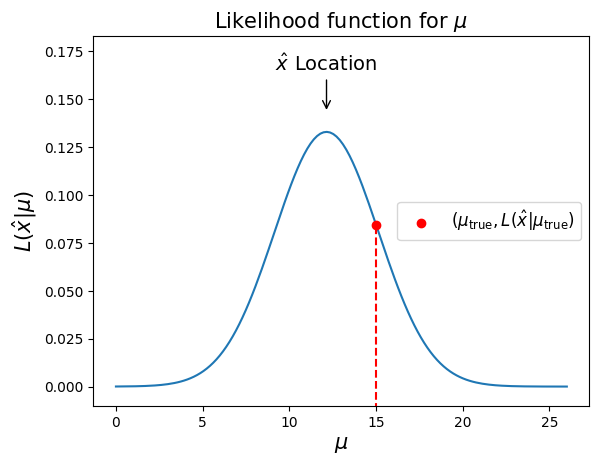

In [2]:
# Create a vector of mu values
mu_values = np.linspace(0, 26, 140)
# No need to do a loop 
L_of_mu = stats.norm.pdf(x_draw, mu_values, sigma)

plt.plot(mu_values, L_of_mu)
plt.scatter(mu_true, stats.norm.pdf(x_draw, mu_true, sigma), color='r', zorder=5, label=r'$(\mu_{\rm true}, L({\hat x} | \mu_{\rm true})$')
# Add a vertical dashed line that starts from the x-axis and terminates at the scatter dot
plt.plot([mu_true, mu_true], [-1, stats.norm.pdf(x_draw, mu_true, sigma)], color='r', linestyle='--')
plt.xlabel(r'$\mu$', fontsize=15)
plt.ylabel(r'$L({\hat x} | \mu)$', fontsize=15)
plt.title(r'Likelihood function for $\mu$', fontsize=15)

# Add arrow at the top of the plot indicating the draw location
plt.annotate(r'${{\hat x}}$ Location', xy=(x_draw, max(L_of_mu) + 0.01), xytext=(x_draw, max(L_of_mu) + 0.03), 
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             verticalalignment='bottom', horizontalalignment='center', fontsize=14)
plt.legend(loc='center right', fontsize=12)
plt.ylim(-0.01, max(L_of_mu) + 0.05)  # adjust y-axis limits to make room for the annotation
plt.show()

###  Example: Projectile Motion   

Imagine a ball moving in the vertical ($y$) direction under the influence of gravity. We know from basic
mechanics that the equation for its trajectory as a function of time is: 
$$
y(t) = y_0 + v_{y0} t - \frac{1}{2} g t^2, 
$$
where $y_0$ is the initial height of the ball, $v_{y0}$ is its initial velocity, and $g$ is the acceleration due to the Earth's gravitational field (we are ignoring air resistance and the Coriolis acceleration). Let's load the parameters into the parameter vector $\boldsymbol{\theta} = (y_0, v_{y0}, g)$, and define the model function 
$$
y_{\rm model}(t, \boldsymbol{\theta}) = y_0 + v_{y0} t - \frac{1}{2} g t^2.
$$

Consider that we have a set of noisy measurements of the position of the particle, $y_i \equiv y(t_i)$, at different times, $t_i$, with standard deviation $\sigma_i$, and that the errors are Gaussian distributed. In other words
$$
y_i = y_{\rm model}(t_i, \boldsymbol{\theta}) + \epsilon_i,
$$
where $\epsilon_i$ is a Gaussian distributed random variable representing the measurement error on the position $y_i = y(t_i)$ at time $t_i$. 
In other words, 
$$
\epsilon_i \sim \mathcal{N}(\epsilon| 0, \sigma_i^2). 
$$

We would like to use the maximum likelihood principle to obtain the best estimate of the parameter vector 
$\boldsymbol{\theta}=(y_0,v_{y0}, g)$. Let's first generate some synthetic data for this example and make a plot to visualize the data. 

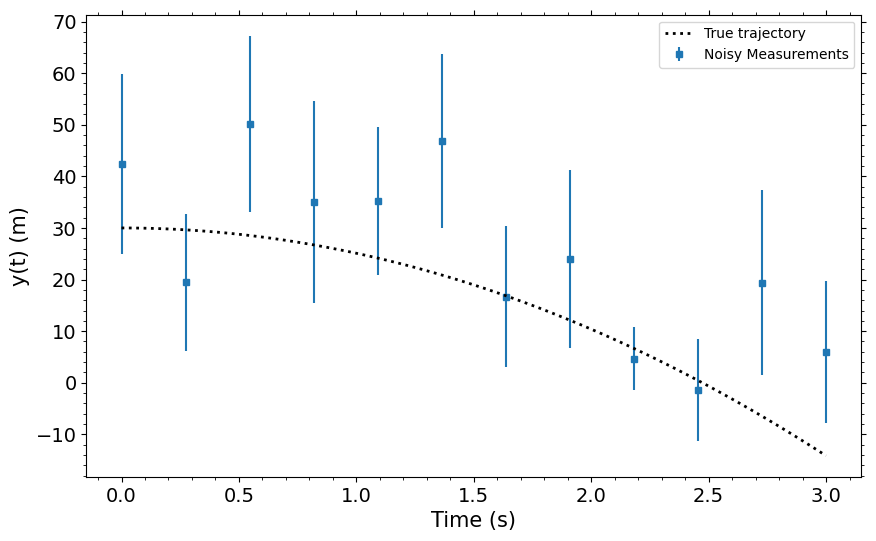

In [3]:
def y_projectile(theta, t):
    """
    Compute the y-coordinate of a projectile as a function of time.
    
    Parameters
    ----------
    theta : array_like
        Parameter vector holding the initial position and velocity, and the acceleration due to gravity according
        to  y_0, v_y0, g = theta
    t : float or array_like
        The time values at which to evaluate the trajectory in seconds.

    Returns
    -------
    y : float or array_like
        The y-coordinate of the projectile at each time t in meters. shape = t.shape
    
    """
    # Unpack the parameters and evaluate
    y_0, v_y0, g = theta
    return y_0 + v_y0 * t - 0.5 * g * t**2

# Define the true value of the parameters
y_0 = 30.0 # m 
v_y0 = 0.0 # ball is dropped from rest
g = 9.81 # m/s^2 # acceleration due to gravity
theta = [y_0, v_y0, g]

# Let's suppose we have measurements every second for 12 seconds
t_obs = np.linspace(0, 3, 12)
yoft_model_true = y_projectile(theta, t_obs)
# Generate some uniformly distributed random errors in the range [5, 20]
# Each y(t_i) has its own uncertainty and the uncertatinties are different. 
# This is referred to as heteroscedastic noise 
sigma_y = rng.uniform(5.0, 20.0, len(t_obs))
#TESTING!
#sigma_y = rng.uniform(0.0001, 0.01, len(t_obs))

# Generate standard Gaussian deviates with mu=0 and sigma=1
gauss_dev =rng.standard_normal(len(t_obs))
# Add the Gaussian noise to the true values to get the noisy measurements
# after scaling the unit variance deviates by the measurement uncertainty, sigma_y
yoft = yoft_model_true + sigma_y * gauss_dev

# Evalute the true model on a finer grid for plotting purposes
t_fine = np.linspace(0, 3, 100)
yoft_true_fine = y_projectile(theta, t_fine)

# Make a plot of the data with error bars
fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(t_obs, yoft, yerr=sigma_y, fmt='s', markersize=5, label='Noisy Measurements')
ax.plot(t_fine, yoft_true_fine, 'k:', linewidth=2, zorder=10, label='True trajectory')
ax.set_xlabel('Time (s)', fontsize=15)
ax.set_ylabel('y(t) (m)', fontsize=15)
ax.legend()

# Some tick mark things
ax.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labelsize=14)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

Now that we have examined the data, we will derive an expression for the likelihood function $L(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma})$, where  $\mathbf{y} = (y(t_1), {y(t_2), \cdots, y}(t_n)) \equiv (y_1, y_2, \cdots, y_n)$ is the vector of measurements, $\boldsymbol{\sigma}= (\sigma(t_1), \sigma(t_2), \cdots, \sigma(t_n) \equiv (\sigma_1, \sigma_2, \cdots, \sigma_n)$ is the vector of standard deviations, and $\boldsymbol{\theta} = (y_0, v_{y0}, g)$ is the vector of parameters. To determine the likelihood function,  we need to construct a probabalistic model for the measurement process and evaluate it at our measurements $\mathbf{y}$. This is easy to do since we know the measurement errors are Gaussian distributed. 
Thus the likelihood function is
<a id='eqn:lhood'></a>
$$
L(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma}) = \prod_i^n \frac{1}{\sqrt{2\pi}\sigma_i}\exp\left\{-\frac{\left[y_i - (y_0 + v_{y0}t_i + gt_i^2)\right]^2}{2\sigma_i^2}\right\} =   \prod_i^n \frac{1}{\sqrt{2\pi}\sigma_i}\exp\left\{-\frac{\left[y_i - y_{{\rm model}, i}(\boldsymbol{\theta})\right]^2}{2\sigma_i^2}\right\},  \tag{1}
$$
where we have defined the shorthand notation $y_{{\rm model}, i}(\boldsymbol{\theta}) \equiv  y_{\rm model}(t_i | \boldsymbol{\theta}) = y_0 + v_{y0}t_i + gt_i^2$.  It is worth pausing to understand what we are doing here. The likelihood function expresses the probability of measuring the data $y_1$ given a value of the parameters $\boldsymbol{\theta} = (y_0, v_{y0}, g)$. The product in the likelihood function is a consequence of the fact that the *measurements are all stastistically independent*, i.e. 

$$ 
L(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma}) = \mathcal{N}(y_1| \mu_1, \sigma_1)\mathcal{N}(y_2| \mu_2, \sigma_2)\cdots \mathcal{N}(y_n| \mu_n, \sigma_n),
$$
where $\mu_i = y_{{\rm model}, i}$.  This is in fact a consequence of what we learned previously for the joint distribution of statistically independent random variables
$$
P(x_1, x_2, \cdots, x_n) = P(x_1)P(x_2)\cdots P(x_n).
$$

We can further simplify eqn.(<a href="#eqn:lhood">1</a>) by noting that 
<a id='eqn:lhood_chi2'></a>
$$
\begin{align}
L(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma}) =&  \frac{1}{\sqrt{2\pi}\sigma_1}\exp\left\{-\frac{\left[y_1 - y_{{\rm model}, 1}(\boldsymbol{\theta})\right]^2}{2\sigma_1^2}\right\}\frac{1}{\sqrt{2\pi}\sigma_2}\exp\left\{-\frac{\left[y_2 - y_{{\rm model}, 2}\boldsymbol{\theta})\right]^2}{2\sigma_2^2}\right\}\times \cdots \times \frac{1}{\sqrt{2\pi}\sigma_n}\exp\left\{-\frac{\left[y_n - y_{{\rm model},n}(\boldsymbol{\theta})\right]^2}{2\sigma_n^2}\right\}\nonumber\\
=& \frac{1}{(2\pi)^{n/2}\sigma_1\sigma_2\cdots\sigma_n}\exp\left\{-\frac{\left[y_1 - y_{{\rm model},1}(\boldsymbol{\theta})\right]^2}{2\sigma_1^2} - \frac{\left[y_2 - y_{{\rm model},2}(\boldsymbol{\theta})\right]^2}{2\sigma_2^2} - \cdots - \frac{\left[y_n - y_{{\rm model},n}(\boldsymbol{\theta})\right]^2}{2\sigma_n^2}\right\}\nonumber\\
=& \frac{1}{(2\pi)^{n/2}\sigma_1\sigma_2\cdots\sigma_n} \exp\left\{-\frac{\chi^2(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma})}{2}\right\}, \tag{2}
\end{align}
$$
where in the last step we used the property of the exponential function, i.e. $\exp(a)\exp(b) = \exp(a+b)$, and defined the **chi-squared** statistic
<a id='eqn:chi2'></a>
$$
\chi^2(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma}) \equiv \sum_{i=1}^n \left[\frac{y_i-y_{{\rm model},i}(\boldsymbol{\theta})}{\sigma_i}\right]^2. \tag{3}
$$


It is convenient and common practice to work with the logarithm of the likelihood. This is because the the likelihood function is typically a product of many probabilities (of making each measurement in a dataset) which are in general numbers less than one. Furthermore, in the outskirts of the probability distributions, the probability values can be very small and can underflow the numerical precision of the computer. Taking the logarithm can better accomodate a large dynamic range, and turns the multiplications of small numbers into additions, which  are numerically more stable.  Taking the logarithm of the likelihood function, we have
<a id='eqn:lnL'></a>
$$
\ln L(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma}) = -\frac{n}{2}\ln(2\pi) - \frac{1}{2}\sum_{i=1}^n \ln(\sigma_i^2) - \frac{\chi^2(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma})}{2}. \tag{4}
$$

Note that, with respect to the parameters $\boldsymbol{\theta}$, the first two terms in eqn.(<a href="#eqn:lnL">4</a>) are constant. 
Thus it is clear that **maximizing the likelihood** is equivalent to **minimizing the chi-squared**. 
This is the basis of the idea of **$\chi^2$ minimization** which is a common approach to fitting data across the physical sciences.

In [4]:
from scipy import optimize

def chi2(theta, y, sigma_y, t_obs):
    """
    Compute the chi-squared value for a model and data.
    
    Parameters
    ----------
    theta : array_like
        The model parameters.
    y : array_like
        The data values.
    sigma_y : array_like
        The standard deviation of the data values.
    t_obs : array_like
        The time values at which the data was observed. 
    """
    y_model = y_projectile(theta, t_obs)
    return np.sum(((y - y_model) / sigma_y)**2)

# Make an initial guess for the parameters. It is cheating to use the true values!
theta_guess = [20, 5, 15]
# This tuple holds the extra arguments for the y_projectile function. 
chi2_args = (yoft, sigma_y, t_obs)
result = optimize.minimize(chi2, theta_guess, args=chi2_args, bounds=[(None, None), (None, None), (None, None)])

print(f'The minimum chi^2 value is: {result.fun:.2f}')
print(f'The max-Lhood parameters are: y_0 = {result.x[0]:.2f} m, v_y0 = {result.x[1]:.2f} m/s, g = {result.x[2]:.2f} m/s^2')
print(f'The true parameters are:      y_0 = {y_0:.2f} m, v_y0 = {v_y0:.2f} m/s, g = {g:.2f} m/s^2')


The minimum chi^2 value is: 8.39
The max-Lhood parameters are: y_0 = 40.01 m, v_y0 = -10.74 m/s, g = 2.58 m/s^2
The true parameters are:      y_0 = 30.00 m, v_y0 = 0.00 m/s, g = 9.81 m/s^2


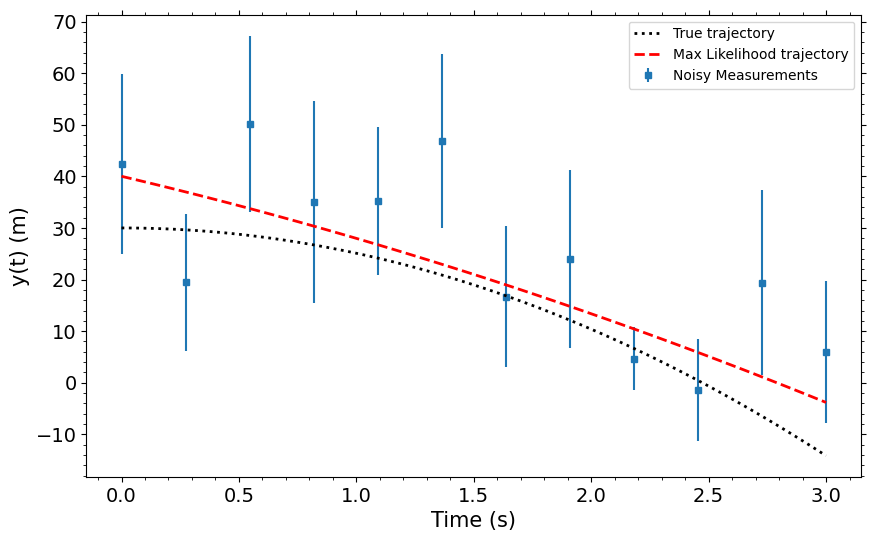

In [5]:
# Evaluate the maxL model on the fine grid of time values for plotting purposes
yoft_model_maxL = y_projectile(result.x, t_fine)
# Make a plot of the data with error bars
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(t_obs, yoft, yerr=sigma_y, fmt='s', markersize=5, label='Noisy Measurements')
ax.plot(t_fine, yoft_true_fine, 'k:', linewidth=2, zorder=10, label='True trajectory')
ax.plot(t_fine, yoft_model_maxL, 'r--', linewidth=2, zorder=10, label='Max Likelihood trajectory')
ax.set_xlabel('Time (s)', fontsize=15)
ax.set_ylabel('y(t) (m)', fontsize=15)
ax.legend()

# Some tick mark things
ax.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labelsize=14)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

## Bayesian Statistics

In the previous example we used the maximum likelihood principle to obtain the best-fit "point" estimate of the parameters for our projectile model,  but the maximum likelihood principle does not provide a way to quantify the measurement uncertainty in these parameter estimates. Bayesian statistics provides an elegant formalism for determining how well we know model parameters. 

Previously we introduced Bayes' theorem
$$
P(y|x) = \frac{P(x|y)P(y)}{P(x)}. 
$$

Now let's imagine that $x$ is the outcome of an experiment represented by some data we have collected. Let $y=\theta$ be a physical parameter or a set of physical parameters of interest (e.g. the value of a fundamental constant, the distance to a galaxy, or the mass of a particle) that 
we would like to measure from our data in the context of a physical model.  Then we can write Bayes' theorem as
<a id='eqn:bayes'></a>
$$
P(\theta|x) = \frac{P(x|\theta)P(\theta)}{P(x)}. \tag{5}
$$
Since the conditional distribution, $P(x|\theta)$, states that the occurrence of $x$  is conditioned on the occurence of $\theta$, 
we can write the total probability of $x$ occuring as the integral over all possible values of $\theta$
$$
P(x) = \int P(x|\theta)P(\theta)d\theta. 
$$
In other words, the quantity $P(x)$ in the denominator of eqn.(<a href="#bayes">5</a>)
can be thought of as the normalization constant for the distribution $P(\theta|x)$ on the left-hand side
<a id='eqn:bayes2'></a>
$$
P(\theta|x) = \frac{P(x|\theta)P(\theta)}{P(x)} = \frac{P(x|\theta)P(\theta)}{\int P(x|\theta)P(\theta)d\theta}\tag{6}, 
$$
in that it ensures that $\int P(\theta|x)d\theta = 1$.

The fundamental objects in Bayesian statistics are probability distributions. The equation above describes how probability distributions evolve as new data $x$ becomes available. To make this more clear, let's modify our notation slightly
<a id='eqn:bayes3'></a>
$$
P(\theta|x) = \frac{L(x|\theta)Pr(\theta)}{\int L(x|\theta)Pr(\theta)d\theta}.  \tag{7}
$$
- $L(x|\theta)$ is the **likelihood function** that we discussed above,  which is the probability of observing the data $x$ given the parameter $\theta$. The $x$ are taken to be the *fixed* set of measurements, and $\theta$ is the independent variable of interest. 
- $Pr(\theta)$ is the **prior distribution**, which is the probability of the parameter $\theta$ based on existing knowledge before acquiring the
data $x$.
- $P(\theta|x)$ is the **posterior  distribution**, which is the revised probability for $\theta$ given the combination of our prior knowledge and the new data $x$ that we acquired. 

We don't have to worry about the normalization of the likelihood, $L(x|\theta)$, or the prior, $Pr(\theta)$, since in the product $L(x|\theta)Pr(\theta)$ in the numerator, any constant factors are going to cancel in the division by the normalization factor in the denominator.

### The Flow of Information

Bayesian inference provides a well-defined quantitative logical framework for synthesizing information about the world we live in. 
Specifically, it tells us how merge new information (the new data $x$) with existing knowledge (the prior) to yield new probability distributions (the posterior). 

There are several important features of Bayesian statistics:
1. The key ingredients are the $\theta$ dependent probability distributions in the numerator of eqn. (<a href="#bayes3">7</a>):
   * $Pr(\theta)$: we are required to explicitly adopt a prior probability distribution that reflects our existing knowledge of $\theta$. 
   *  $L(x|\theta)$: we are required to construct a **generative probablistic model** for the measurement process, which is the likelihood function, $L(x|\theta)$. 
  
2. Any amount of new data, $x$, even a single measurement, can be used to revise the probability distribution for $\theta$, yielding a new posterior $P(\theta|x)$. 
   
3. There is no need to pre-specify the end point of an experiment or investigation. Data can be incorporated as they become available. Essentially, one replaces the prior $Pr(\theta)$ with the posterior $P(\theta|x)$, and then obtains new data, cycling through the inference loop as often as desired. This is illustrated by the flow chart below. 


<div style="text-align: left">
    <img src="figures/bayesian_flow.png" style="width: 1000px; margin-left: 20px;"/>
</div>


### Example: The Distance to a Galaxy

An astronomical catalog indicates that the distance to a galaxy is $D_0 = 11 \pm 4$ Mpc. Here Mpc is an astronomical distance unit that stands for megaparsecs, i.e. one million parcsecs, where $1~{\rm pc} = 3.086 \times 10^{16}~{\rm m}$. It is understood that the quoted uncertainty is the standard deviation, $\sigma_0 = 4~{\rm Mpc}$, of a Gaussian distribution that describes our current knowledge of the distance. Suppose we make a new measurement of the distance to this galaxy, $D_1 = 7.3\pm 2~{\rm Mpc}$, where again the measurement errors are Gaussian distributed and $\sigma_1=2~{\rm Mpc}$.  What is the revised probability distribution for the distance to the galaxy in light of our new measurement?



The problem states that both our prior knowledge and the new  measurement are described by Gaussians.  To clarify the notation: 
- $D$ denotes the random variable representing the unknown distance to the galaxy (the $\theta$ parameter in the notation of Bayes theorem). 
- $D_0$ is the prior distance (with standard deviation $\sigma_0$) to the galaxy. 
- $D_1$ is the new measurement (with standard deviation $\sigma_1$) of the distance (the data $x$ in the notation of Bayes theorem). 

Since the probability distributions are all Gaussian we can write
$$
Pr(D) = \frac{1}{\sqrt{2\pi}\sigma_0}\exp\left[-\frac{(D-D_0)^2}{2\sigma_0^2}\right]
$$
and 
$$
L(D_1|D) = \frac{1}{\sqrt{2\pi}\sigma_1}\exp\left[-\frac{(D_1-D)^2}{2\sigma_1^2}\right]. 
$$

The unnormalized posterior distribution is then 
$$
P(D |D_1) \propto L(D_1|D)Pr(D) = \frac{1}{\sqrt{2\pi}\sigma_1}\exp\left[-\frac{(D_1-D)^2}{2\sigma_1^2}\right]\frac{1}{\sqrt{2\pi}\sigma_0}\exp\left[-\frac{(D-D_0)^2}{2\sigma_0^2}\right].
$$

It is easy to show that the product of two Gaussian probability distributions is also a Gaussian, so we can rewrite the posterior (now normalized) as
$$
P(D |D_1) = \frac{1}{\sqrt{2\pi}\sigma_\ast}\exp\left[-\frac{(D-D_\ast)^2}{2\sigma_\ast^2}\right], 
$$
where 
<a id='eqn:mean'></a>
$$
D_\ast = \frac{w_0 D_0 + w_1 D_1}{w_0 + w_1} = \frac{\sigma_1^2 D_0 + \sigma_0^2 D_1}{\sigma_0^2 + \sigma_1^2}, \tag{8}
$$
and 
<a id='eqn:sigma'></a>
$$
\sigma_\ast^2 = \frac{1}{w_0 + w_1} =  \frac{\sigma_0^2 \sigma_1^2}{\sigma_0^2 + \sigma_1^2} = \sigma_0^2\left(\frac{\sigma_1^2}{\sigma_0^2 + \sigma_1^2}\right). \tag{9}
$$
and we defined the *weights* 
$$
w_0 = \frac{1}{\sigma_0^2} \quad \text{and} \quad w_1 = \frac{1}{\sigma_1^2}.
$$

Because the posterior is a Gaussian, the mean value and standard deviation of the distance to the galaxy, $D$, can be extracted by 
inspection, i.e. 
$$
\langle D\rangle \pm \sigma_D = D_\ast \pm \sigma_\ast. 
$$
Moreover, the expressions for $D_\ast$ and $\sigma_\ast$ are consistent with our intuition:

- The mean value, $\langle D\rangle$, is a weighted average of the prior distance and the new measurement, where the weights are inversely proportional to their respective variances.   In other words, we are *optimally combining* the information -- if the new measurement is very precise ($\sigma_1$ is small, $w_1$ is large), then its contribution will dominate the posterior mean, whereas if the prior is very precise ($\sigma_0$ is small, $w_0$ is large), then the prior dominates the posterior mean.   

- The standard deviation, $\sigma_{\rm D}$, of the posterior is the harmonic mean of the standard deviations of the prior and the new measurement. 
From the last equaltiy of eqn.(<a href="#sigma">9</a>), it can be seen that the standard deviation of the posterior is always less than the standard deviation of the prior, as it should be, since given new information, we should be more certain about the value of the parameter.

- It is instructive to consider the limit of the expressions for $D_\ast$ and $\sigma_\ast$ in eqns.(<a href="#mean">8</a>) and (<a href="#sigma">9</a>) $\sigma_1 \ll \sigma_0$ ($w_1  \gg w_0$), i.e. where the new measurement is far more 
  precise than our prior knowledge. This is the limit of an **uninformative prior**, since if $\sigma_1 \ll \sigma_0$, then the prior distribution, $Pr(D)$ is becoming very broad (and hence approaching a constant) relative to an extremely narrowly peaked likelihood, $L(D_1|D)$. It is easy to see that in this limit, 
  $$
    D_\ast \approx D_1, \quad \sigma_\ast \approx \sigma_1, 
    $$
  which is to say that the posterior mean and standard deviation are completey dominated by the new measurement. This is the behavior we expect. 

Prior:       D_0    = 11.0 +- 4.0 Mpc
Measurement: D_1    =  7.3 +- 2.0 Mpc
Posterior:   D_star =  8.0 +- 1.8 Mpc


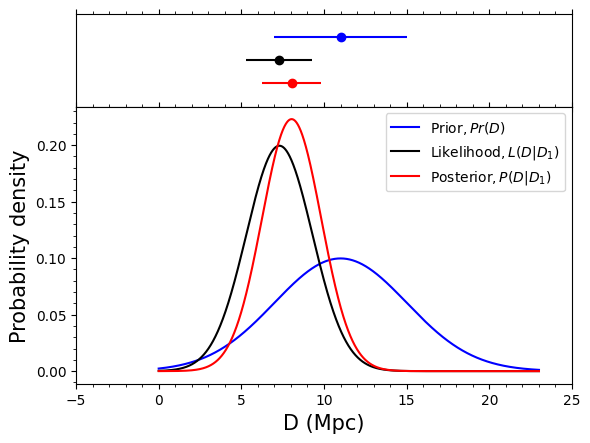

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# Parameters for the prior
D_0 = 11.0  # Prior mean, Mpc
sigma_0 = 4.0 #4.0 # Prior standard deviation, Mpc
# Parameters for the likelihood 
D_1 = 7.3 # Measured distance, Mpc
sigma_1 = 2.0 #2.0 # Measurement uncertainty, Mpc
# Parameters for the posterior
w_0 = 1/sigma_0**2
w_1 = 1/sigma_1**2
D_star = (w_0*D_0 + w_1*D_1)/(w_0 + w_1)
sigma_star = 1/np.sqrt(w_0 + w_1)

print(f"Prior:       D_0    = {D_0:4.1f} +- {sigma_0:.1f} Mpc")
print(f"Measurement: D_1    = {D_1:4.1f} +- {sigma_1:.1f} Mpc")
print(f"Posterior:   D_star = {D_star:4.1f} +- {sigma_star:.1f} Mpc")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3], 'hspace': 0})

# Plot error bars for the prior, measurement, and posterior in the upper subplot
ax1.errorbar(D_0, 3, xerr=sigma_0, fmt='o', color='blue')
ax1.errorbar(D_1, 2, xerr=sigma_1, fmt='o', color='black')
ax1.errorbar(D_star, 1, xerr=sigma_star, fmt='o', color='red')
ax1.set_ylim(0, 4)
ax1.set(yticks=[])

# Now plot the prior, the likelihood, and the posterior
D = np.linspace(0, 23, 10001)
Pr = stats.norm.pdf(D, D_0, sigma_0)
L = stats.norm.pdf(D, D_1, sigma_1)
P = stats.norm.pdf(D, D_star, sigma_star)
ax2.plot(D, Pr, color='blue', label=r'${\rm Prior}, Pr(D)$')
ax2.plot(D, L, color='black', label=r'${\rm Likelihood}, L(D|D_1)$')
ax2.plot(D, P, color='red', label=r'${\rm Posterior}, P(D|D_1)$')

# Add minor ticks
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

ax2.set_ylabel('Probability density', fontsize=15)
ax2.set_xlabel('D (Mpc)', fontsize=15)
ax2.legend()
ax2.tick_params(which='both', bottom=True, top=True, labelbottom=True)

# Get x-axis tick locations from ax2 and set them for ax1
ax1.set_xticks(ax2.get_xticks())
ax1.tick_params(which='both', bottom=True, top=True, labelbottom=False)
plt.show()

## Example: Projectile Motion Bayesian Inference 

We will now proceed to use Bayesian statistics to infer the probability distribution governing the parameters of the projectile motion model using the synthetic data we generated earlier. In our previous demonstration of maximum likelihood (chi-square minimization) fitting using this data, we fit for the three parameters, $\boldsymbol{\theta} =(y_0, v_{y0}, g)$. In this context,  applying Bayesian inference would thus yield the posterior distribution 
$$ 
P(y_0, v_{y0}, g|\mathbf{y}), 
$$
which is a joint probability distribution for three variables. Note that there is no guarantee that the model parameters are statistically independent, so the joint distribution is not factorizable into a product of individual probability distributions for each parameter.  Since visualizing probability distributions in multiple dimensions is more complicated, we will instead consider just a single parameter model to build intuition. Specifically, we will imagine that we know the height from which we dropped the ball, $y_0=30~{\rm m}$, and that we dropped the ball from rest, $v_{y0}=0$.  We will then use Bayesian inference to infer the probability distribution for the acceleration due to gravity, $g$.


Let's assume that we do not have any prior information on $g$, so we will adopt an uninformative constant prior probability, 
$$
Pr(g) = {\rm const}. 
$$
Note that this means that $g$ can be positive or negative, i.e. we are not assuming any prior knowledge on the direction of the acceleration. Enforcing the positivity of $g$ would correspond to adopting a different piecewise prior 
$$
Pr(g) = \begin{cases} 
{\rm const} & g > 0,\\
0 & g \leq 0.
\end{cases}
$$
As we will see below, whether or not this **choice** for the prior actually matters will depend on the accuracy of our measurements. 

According to Bayes' theorem, the posterior distribution for $g$ is then
$$
P(g|\mathbf{y},\boldsymbol{\sigma}) = \frac{L(\mathbf{y}| g, \boldsymbol{\sigma})Pr(g)}{\int L(\mathbf{y}| g, \boldsymbol{\sigma})Pr(g)dg}.
$$
Taking the logarithm of the posterior distribution, we have
$$
\begin{align}
\ln P(g|\mathbf{y}, \boldsymbol{\sigma}) =& \ln L(\mathbf{y}| g, \boldsymbol{\sigma}) + \ln Pr(g) - \ln \int L(\mathbf{y}| g, \boldsymbol{\sigma})Pr(g)dg\nonumber\\
                    =& \ln L(\mathbf{y}| g, \boldsymbol{\sigma}) + {\rm const}.\nonumber
\end{align}
$$
where in the second equality we have exploited the fact that neither second term, $Pr(g) = {\rm const}$, nor the third normalization integral term depend on the variable $g$. It is customary to drop such additive constants to $\ln P$, since the addition of a constant to the logarithm is equivalent to multiplication of $P$ by another constant. Since the posterior distribution has to satisfy a normalization condition
$$
\int P(g|\mathbf{y},  \boldsymbol{\sigma})dg = 1,
$$
which is just the denominator of the right-hand side of the first equation above, we can drop this constant provided that we normalize the posterior distribution after we have computed it.

We already derived the likelihood function for the projectile motion dataset, $L(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma})$ in eqn.(<a href="#eqn:lnL">4</a>). Substituting  $\boldsymbol{\theta} = g$, we have
$$
\ln L(\mathbf{y}| g, \boldsymbol{\sigma}) = -\frac{n}{2}\ln(2\pi) - \frac{1}{2}\sum_{i=1}^n \ln(\sigma_i^2) - \frac{\chi^2(\mathbf{y}| g, \boldsymbol{\sigma})}{2}, 
$$
where $\chi^2(\mathbf{y}| g, \boldsymbol{\sigma})$ is the chi-squared statistic defined in eqn.(<a href="#eqn:chi2">3</a>). Note that the first two terms of this expression are constant with respect to $g$, so we can drop them following the same logic as above for $\ln P(g|\mathbf{y}, \boldsymbol{\sigma})$.

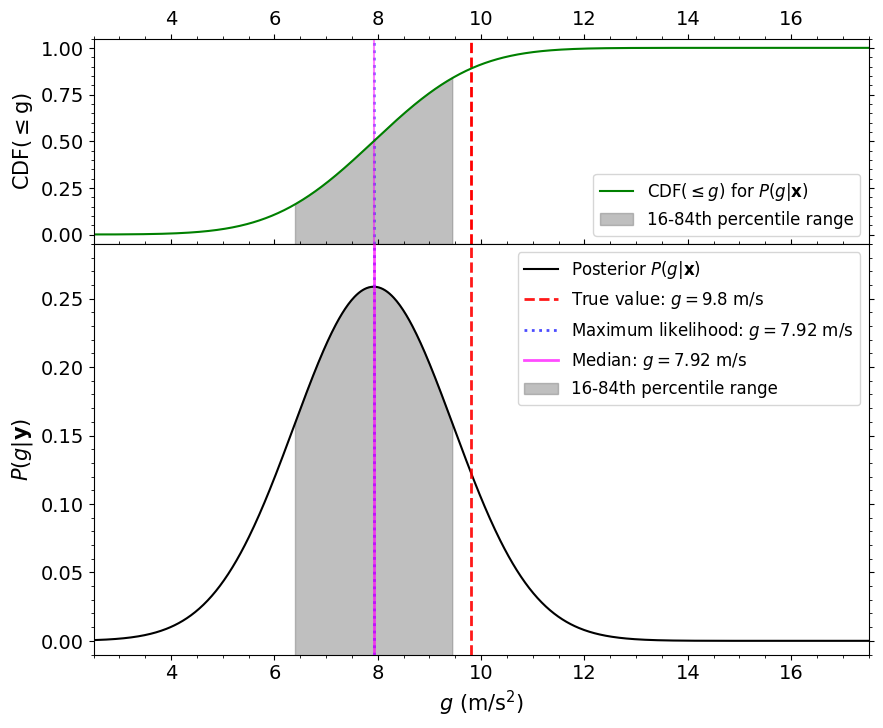

In [17]:
from scipy import stats, integrate, interpolate

# Lambda functions are a compact way to define a function in one line.  
# This is a clever trick since the old chi2 function is a function of the three
# element theta vector, whereas now I just want to vary a single parameter g
chi2_gonly = lambda g, y, sigma_y, t_obs: chi2([30.0, 0.0, g], y, sigma_y, t_obs)


# Define the likelihood function
def log_likelihood(g, ydata, sigma_y, t_obs):
    """
    Compute the log of the likelihood for a given value of v_0
    
    Parameters
    ----------
    g : float
        The acceleration due to gravity in m/s^2
    ydata : array_like
        The observed positions data at each time in m. 
    sigma_y : array_like
        The uncertainties on the position measurements at each time in m. 
    t_obs : array_like
        The time of each position measurement in s. We assume this is known exactly.

    Returns
    -------
    lnL : float
        The log of the likelihood evaluated at g.  
    """

    return -0.5*chi2_gonly(g, ydata, sigma_y, t_obs)    

# We will redo the likelihood maximization (chi^2 minimization) to use as a point of comparison. 
# The answer will be different now, since before we varied all three parameters (y_0, v_y0, g)
# whereas now we are only varying g.
g_guess = [15.0]
# This tuple holds the extra arguments for the chi2_gonly function. 
chi2_args = (yoft, sigma_y, t_obs)

result_g = optimize.minimize(chi2_gonly, g_guess, args=chi2_args, bounds=[(0, None)])
g_maxL = result_g.x[0]

# Evaluate the likelihood as a function of g on a finely spaced grid, from 0 to 20 m/s^2
g_values = np.linspace(0, 20, 1000)
# This list comprehension is compact way to write a for loop, evaluating the likelihood at each g
lnL_values = np.array([log_likelihood(g, yoft, sigma_y, t_obs) for g in g_values])
# Our prior is flat, so the posterior is proporitional to the likelihood. 
# We will normalize in a moment, but we subtract the maximum value of the log-likelihood
# to avoid taking the expoential of very large numbers. You can always add or subtract a constant from lnL
# since that is multiplication of L by a constant, and multiplying by constants will drop out when normalizing.
P_unnorm = np.exp(lnL_values - np.max(lnL_values))
# Now perform the normalization by integrating the tabulated unnormalized posterior using the trapezoidal rule
P_norm = integrate.trapezoid(P_unnorm, g_values)
# This is the final normalized posterior
Pofg = P_unnorm/P_norm

# Compute the cumulative distribution function (CDF) of the posterior using the scipy.intergrate cumulative_trapezoid 
# function. For a grid of y values evaluated at a grid of x values, cumulative_trapezoid returns to you an array that has been
# trapezoidal rule integrated up to the index (x-location) of the array. In other words: 
# cdf[0] = \int_x[0]^x[0] P(y) = 0 (hence the initial=0 argument)
# cdf[i] = \int_x[0]^x[i] P(y)  and 
# cdf[-1] = \int_x[0]^x[-1] P(y). This is equal to 1 by the normalization of the posterior that we performed above. 

cdf = integrate.cumulative_trapezoid(Pofg, g_values, initial=0)
# Determine the 16th, 50th, and 84th percentiles of the posterior from the CDF. Note that this actually requires 
# inverting the CDF, i.e. g_16 = CDF^{-1}(0.16). We perform this inversion via a linear interpolatio. In other words, 
# if y(x)=f(x) is a function then x(y) = f^{-1}(y) is the inverse function, which can be computed via 
# xofy = interpolate.interp1d(y_values, x_values)(y).
g_16 = interpolate.interp1d(cdf, g_values)(0.16)
g_50 = interpolate.interp1d(cdf, g_values)(0.50)
g_84 = interpolate.interp1d(cdf, g_values)(0.84)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [1, 2], 'hspace': 0.0})

# Plot the CDF in the upper subplot
ax1.axvline(g, color='r', linestyle='--', linewidth=2.0)
ax1.axvline(g_maxL, color='b', linestyle=':', alpha=0.5, linewidth=2.0)
ax1.axvline(g_50, color='magenta', linestyle='-', alpha=0.5)

ax1.plot(g_values, cdf, color='g', label=r'${\rm CDF}(\leq g)$ for $P(g|\mathbf{x})$')
ax1.fill_between(g_values, -5, cdf, where=((g_values >= g_16) & (g_values <= g_84)), color='gray', alpha=0.5, label='16-84th percentile range', zorder=1)
ax1.set_ylabel(r'${\rm CDF(\leq g)}$', fontsize=15)
ax1.legend(loc='lower right', fontsize=12)
ax1.set_ylim(-0.05, 1.05)

# Plot the posterior distribution in the lower subplot
ax2.plot(g_values, Pofg, color='k', label=r'Posterior $P(g|\mathbf{x})$')
ax2.axvline(g, color='r', linestyle='--', alpha=0.9, linewidth=2.0, label=r'True value: $g=9.8~{\rm m/s}$', zorder=3)
ax2.axvline(g_maxL, color='b', linestyle=':', linewidth=2.0, alpha=0.7, label=r'Maximum likelihood: $g={:.2f}~{{\rm m/s}}$'.format(g_maxL), zorder=3)
ax2.axvline(g_50, color='magenta', linestyle='-', linewidth=2.0, alpha=0.7, label=r'Median: $g={:.2f}~{{\rm m/s}}$'.format(g_50), zorder=4)
ax2.fill_between(g_values, -10.0, Pofg, where=((g_values >= g_16) & (g_values <= g_84)), color='gray', alpha=0.5, label='16-84th percentile range', zorder=1)
ax2.set_xlabel(r'$g~({\rm m/s^2})$', fontsize=15)
ax2.set_ylabel(r'$P(g|\mathbf{y})$', fontsize=15)
ax2.set_xlim(2.5, 17.5)
ax2.set_ylim(-0.01, 0.29)

# Some tick mark things
ax1.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=False, labeltop=True,labelsize=14)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())


# Some tick mark things
ax2.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labeltop=False, labelsize=14)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

# Add the legend from the upper plot to the lower plot
ax2.legend(loc='upper right', fontsize=12)


plt.show()


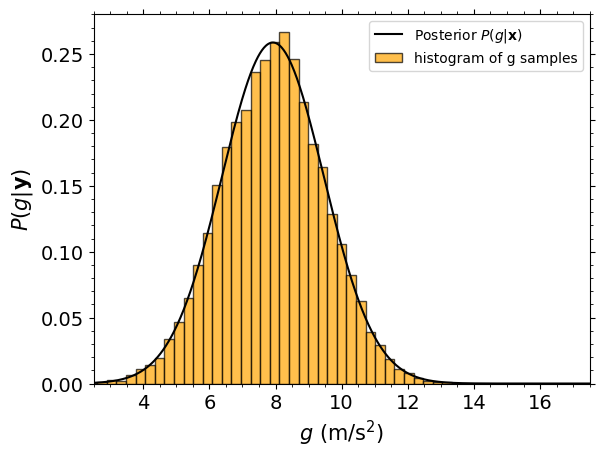

In [8]:
# Generate a set of random samples from the CDF using the inverse CDF method discussed in Week8
nsamp = 10000
cdf_inverse = interpolate.interp1d(cdf, g_values)
uniform_samples = rng.uniform(0, 1, nsamp)
g_samples = cdf_inverse(uniform_samples)

# Make a histogram of the samples on top of the posterior to verify our sampling worked. 
fig, ax = plt.subplots()


# Compute the probability density, P(y), of the y_samples using np.histogram 
bins = np.linspace(0, 20, 70)
Pofg_hist, _ = np.histogram(g_samples, bins=bins, density=True)

# Plot the histogram
plt.bar(bins[:-1], Pofg_hist, width=np.diff(bins), align='edge', color='orange', alpha=0.7, edgecolor='black', label='histogram of g samples')
# Plot the posterior distribution in the lower subplot
plt.plot(g_values, Pofg, color='k', label=r'Posterior $P(g|\mathbf{x})$')

plt.xlabel(r'$g~({\rm m/s^2})$', fontsize=15)
plt.ylabel(r'$P(g|\mathbf{y})$', fontsize=15)
plt.xlim(2.5, 17.5)
# Some tick mark things
plt.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labeltop=False, labelsize=14)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.legend(loc='upper right', fontsize=10)

plt.show()


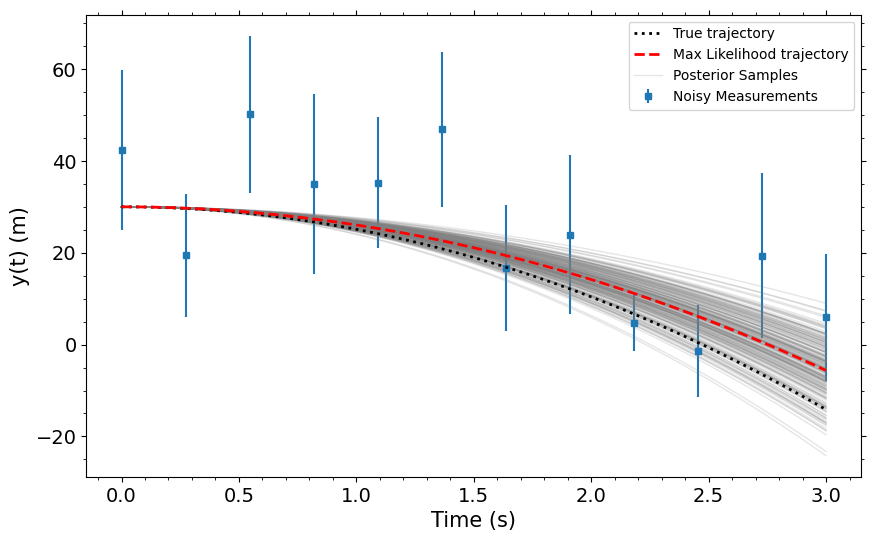

In [9]:
# Evaluate the model at the maximum likelihood value of g (from the single parameter chi^2 minimization)
yoft_model_g_maxL = y_projectile([y_0, v_y0, g_maxL], t_fine)
# Make a plot of the data with error bars
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(t_obs, yoft, yerr=sigma_y, fmt='s', markersize=5, label='Noisy Measurements')
ax.set_xlabel('Time (s)', fontsize=15)
ax.set_ylabel('y(t) (m)', fontsize=15)

# Overplot the true value and the maximum likelihood value 
ax.plot(t_fine, yoft_true_fine, 'k:', linewidth=2, zorder=10, label='True trajectory')
ax.plot(t_fine, yoft_model_g_maxL, 'r--', linewidth=2, zorder=10, label='Max Likelihood trajectory')

# Randomly select 100 samples from the posterior samples
g_samp_200 = rng.choice(g_samples, size=200, replace=False)
# Plot 100 random samples from the posterior as thin gray lines to show the spread of the model from these model realizations
for ig, g_sample in enumerate(g_samp_200):
    yoft_gsamp = y_projectile([y_0, v_y0, g_sample], t_fine)
    ax.plot(t_fine, yoft_gsamp, 'gray', alpha=0.2, linewidth=1, label='Posterior Samples' if ig == 0 else None)
    
ax.legend()

# Some tick mark things
ax.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labelsize=14)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

## Goodness of Fit

### The $\chi^2$ Distribution

Suppose that we have a set of $n$ independent samples, $x_i$, from a set of $n$  independent Gaussian distributions with mean $\mu_i$ and standard deviation $\sigma_i$.  Let's define 
$$
\epsilon_i = x_i - \mu_i
$$
which implies
$$
\epsilon_i \sim \mathcal{N}(\epsilon_i| 0, \sigma_i^2). 
$$
Now consider the sum of the squares of these deviations
$$
\chi^2 = \sum_{i=1}^n \frac{\epsilon_i^2}{\sigma_i^2}.  
$$
So now $\chi^2$ is a new random variable that is the sum of the squares of $n$ independent Gaussian random variables.  It can be shown 
mathematically that this new variable follows the **$\boldsymbol{\chi^2}$-distribution** with $\mathbf{n}$ **degrees of freedom**. 
The probability density function of the $\chi^2$ distribution is given by
$$
P(\chi^2|n) = \frac{(\chi^2)^{(n-2)/2}}{2^{n/2}(n/2-1)!}\exp\left[-\frac{1}{2}\chi^2\right]. 
$$
where $N! \equiv N(N-1)(N-2)\cdots 1$ is defined to be the factorial of $N$.

We can use the properties of the mean, $\langle \rangle$,  and definition of the variance operator, $\rm {Var}$, that we studied before to compute the mean value of the $\chi^2$ distribution. We have
$$
\langle \chi^2\rangle = \langle \sum_{i=1}^n \frac{\epsilon_i^2}{\sigma_i^2}\rangle = \sum_{i=1}^n \frac{\langle \epsilon_i^2\rangle}{\sigma_i^2}, 
$$
where we used the property that the mean is a linear operator: $\langle Ax + By\rangle = A\langle x\rangle + B\langle y\rangle$. Now note that
$$
{\rm Var}(\epsilon_i) = \sigma_i^2 \equiv \langle \epsilon_i^2\rangle - \langle \epsilon_i\rangle^2 = \langle \epsilon_i^2\rangle - 0 \quad \Rightarrow \quad \langle \epsilon_i^2\rangle = \sigma_i^2, 
$$
where we used the definition of the variance and the fact that $\mathcal{N}(\epsilon_i| 0, \sigma_i^2)$ has zero mean hence $\langle \epsilon_i\rangle = 0$. So we finally have
$$
\langle \chi^2\rangle = \sum_{i=1}^n \frac{\langle \epsilon_i^2\rangle}{\sigma_i^2} = \sum_{i=1}^n \frac{\sigma_i^2}{\sigma_i^2} =  \sum_{i=1}^n 1 = n, 
$$
which is to say that the mean value of the $\chi^2$ distribution is equal to the number of degrees of freedom, $n$. This relationship 
can also be derived by direct integration of the probability density function of the $\chi^2$ distribution $\int \chi^2 P(\chi^2|n)d\chi^2 = n$.

To compute the variance of the $\chi^2$ distribution, we need to perform the integral 
$$
{\rm Var}(\chi^2) =\sigma_{\chi^2}^2 \equiv  \int (\chi^2 - \langle \chi^2\rangle)^2 P(\chi^2|n)d\chi^2. 
$$
This is pretty straightforward to do analytically, but we will not do it here. The result is
$$
\sigma_{\chi^2}^2  = 2n. 
$$

The central limit theorem guarantees that in the limit of large $n$, the $\chi^2$ distribution approaches a Gaussian distribution. The mean and 
variance of the $\chi^2$ distribution that we just derived/stated then become the mean and variance of the Gaussian, so we have
$$
\lim_{n\rightarrow \infty} P(\chi^2|n) = \mathcal{N}(\chi^2|n, 2n) = \frac{1}{\sqrt{2\pi}\sqrt{2n}}\exp\left[-\frac{1}{2}\frac{(\chi^2 - n)^2}{2n}\right].
$$
The Gaussian form is already quite a good approximation for $n\gtrsim 30$.

To summarize: 
- The mean value of the $\chi^2$ distribution is equal to the number of degrees of freedom, $\langle \chi^2\rangle = n$.
- The variance of the $\chi^2$ distribution is equal to twice the number of degrees of freedom, $\sigma_{\chi^2}^2 = 2n$.
- The $\chi^2$ distribution approaches a Gaussian distribution in the limit of large $n$.

Below we plot the probability density function of the $\chi^2$ distribution for $n=2, 4$ and $9$ degrees of freedom. 

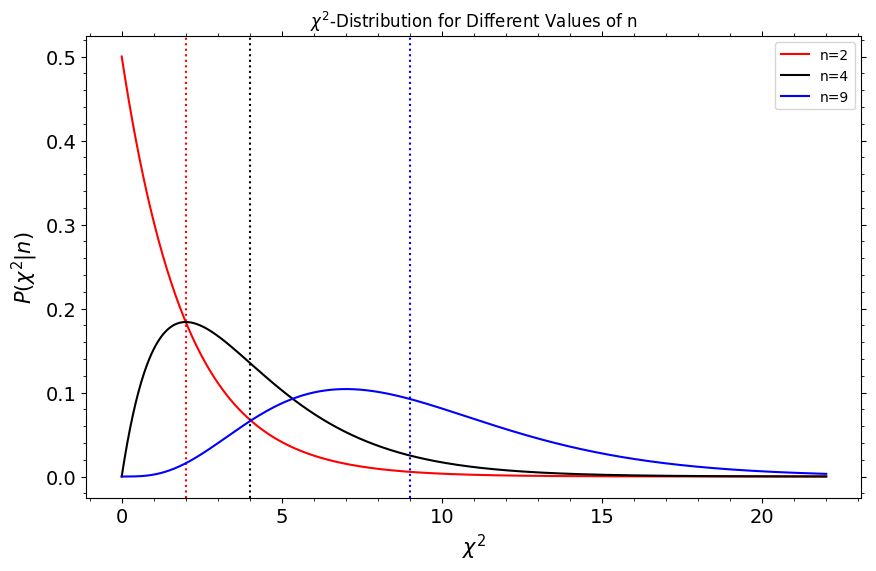

In [10]:
n_values = [2, 4, 9]

# Generate x values
chi_sq = np.linspace(0, 22, 1000)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10,6))

colors = ['red', 'black', 'blue']
# Plot the chi^2 distribution for each value of n
for ii, n in enumerate(n_values):
    # Calculate the chi^2 distribution using scipy.stats
    y = stats.chi2.pdf(chi_sq, n)

    # Plot the chi^2 distribution
    ax.plot(chi_sq, y, color=colors[ii], label=f'n={n}')

    # Add vertical dotted line for the mean
    ax.axvline(n, linestyle='dotted', color=colors[ii])

# Set the plot title and labels
ax.set_title(r'$\chi^2$-Distribution for Different Values of n')
ax.set_xlabel(r'$\chi^2$', fontsize=15)
ax.set_ylabel(r'$P(\chi^2|n)$', fontsize=15)
ax.legend()

# Some tick mark things
ax.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labeltop=False, labelsize=14)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Show the plot
plt.show()



## Goodness of Fit

We discussed that if we fit a model, $\mathbf{y}_{\rm model}(\boldsymbol{\theta})$, to a dataset, $\mathbf{y}$, with errors, $\epsilon_i$,
drawn from the normal distribution $\mathcal{N}(\epsilon_i| 0, \sigma_i^2)$, then maximum-likelihood estimation is equivalent to 
$\chi^2$ minimization, where we defined the $\chi^2$ statistic by 
$$
\chi^2(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma}) \equiv \sum_{i=1}^n \left[\frac{y_i-y_{{\rm model},i}(\boldsymbol{\theta})}{\sigma_i}\right]^2. 
$$
Then we emphasized that the resulting point-estimate of the parameters, $\boldsymbol{\theta}_{\rm maxL}$, does not provide a measure of the uncertainty in the parameter estimates. To quantify the parameter uncertainty, we used Bayesian inference to obtain the posterior distribution, $P(\boldsymbol{\theta}|\mathbf{y})$.   However, neither maximum likelihood estimation nor Bayesian inference provide a measure of *how well the model fits the data*.  There are thus two separate but related types of questions that we want to ask when fitting data: 
1. **What are the parameters**: What is the "best-fit" or maximum likelihood set of model parameters, $\boldsymbol{\theta}_{\rm maxL}$, and/or how well do we know the parameters given the data, $P(\boldsymbol{\theta}|\mathbf{y})$?

2. **Goodness of Fit**: How well does the model, $\boldsymbol{y}_{\rm model}(\boldsymbol{\theta})$, fit the data $\mathbf{y}$ given the errors $\boldsymbol{\sigma}$?

The crux of the issue is that your knowledge of $\boldsymbol{\theta}$ from a fitting analysis is  only as good as the model that you choose and your understanding of the errors in your data, $\boldsymbol{\sigma}$. To address this point we need a way to quantify the goodness of fit.

### The $\chi^2$ Goodness of Fit Test

For the case of Gaussian distributed errors, the $\chi^2$ statistic and the $\chi^2$ distribution, $P(\chi^2|n)$, provide a means to quantify the goodness of fit. The key point is that
$$
\epsilon_i \equiv y_i - y_{{\rm model},i}(\boldsymbol{\theta_{\rm true}}) \sim \mathcal{N}(\epsilon_i| 0, \sigma_i^2). 
$$
Thus in the limit where we know the true model, $\theta_{\rm true}$,  the $\chi^2$ statistic should be distributed according to the $\chi^2$ distribution with $n$ degrees of freedom, $P(\chi^2|n)$. 

Of course in practice when fitting data, we never precisely know $\boldsymbol{\theta_{\rm true}}$. If we did, we probably would not be collecting data in the first place!  However, we can still use the $\chi^2$ distribution to test the hypothesis that the model is a good fit to the data.  Specifically, for a chosen set of 
parameter values, let's say best-fit values, $\boldsymbol{\theta}_{\rm maxL}$, we can compute the $\chi^2$ statistic
$$
\chi^2(\boldsymbol{\theta_{\rm maxL}}|\mathbf{y}, \boldsymbol{\sigma}) = \sum_{i=1}^n \left[\frac{y_i-y_{{\rm model},i}(\boldsymbol{\theta}_{\rm maxL})}{\sigma_i}\right]^2.
$$


We then ask the question: What is the probability of observing this value,  $\chi^2(\boldsymbol{\theta_{\rm maxL}}|\mathbf{y}, \boldsymbol{\sigma})\equiv \chi^2_{\rm maxL}$, given the number of degrees of freedom, $n$?  

- If the model is a good fit to the data, then: the probability of observing a value of the $\chi^2$ statistic **larger than** $\chi^2(\boldsymbol{\theta_{\rm maxL}}|\mathbf{y}, \boldsymbol{\sigma})$ should be **high**: 
  $$
  P(\chi^2_{\rm maxL} \leq \chi^2 < \infty| n) = \int_{\chi^2_{\rm maxL}}^\infty P(\chi^2|n)d\chi^2 = 1 - {\rm CDF}(\leq \chi^2_{\rm maxL}|n) \sim 1.
  $$

- If the model is a poor fit to the data, then the probability of observing a value *larger than** $\chi^2_{\rm maxL}$  should be **low**: 
  $$
  P(\chi^2_{\rm maxL} \leq \chi^2 < \infty| n) = \int_{\chi^2_{\rm maxL}}^\infty P(\chi^2|n)d\chi^2 = 1 - {\rm CDF}(\leq \chi^2_{\rm maxL}|n) \ll 1.
  $$

- Similarly, if the error bars are underestimated, then the probability of observing a value **larger than** $\chi^2_{\rm maxL}$ should be **low**:
  $$
  P(\chi^2_{\rm maxL} \leq \chi^2 < \infty| n) = \int_{\chi^2_{\rm maxL}}^\infty P(\chi^2|n)d\chi^2 = 1 - {\rm CDF}(\leq \chi^2_{\rm maxL}|n) \ll 1.
  $$

- If the error bars overestimated, then the probability of observing a value **less than or equal to** $\chi^2_{\rm maxL}$ should be **low**: 
  $$
  P(0 \leq \chi^2 \leq \chi^2_{\rm maxL}| n) = \int_{0}^{\chi^2_{\rm maxL}} P(\chi^2|n)d\chi^2 = {\rm CDF}(\leq \chi^2_{\rm maxL}|n) \ll 1.
  $$



#### The number of degrees of freedom
How do we calculate the number of degrees of freedom? Provided that our model is **linear** in the parameters, then the number of degrees of freedom is equal to the number of data points, $N$, minus the number of parameters, $m$, that we fit for:
$$
n = N - m.
$$
The reason that we have to subtract off the number of parameters is that we are using the data to fit for the parameters, so the actual number of independent data points is going to be reduced exactly by, $m$, the number of parameters that we fit for.

For models $y_{\rm model}(\boldsymbol{\theta})$ that depend non-linearly on the parameters, $\boldsymbol{\theta}$,  the number of degrees of freedom is not as straightforward to calculate. This is intuitive, since some parameters, $\theta_i$, can clearly then be much more influential and other parameters, $\theta_k$, could be nearly irrelevant, owing to the non-linear dependencies. It is nevertheless still common practice to use the value $n = N - m$ as a rough estimate of the number of degrees of freedom for non-linear models, notwithstanding these caveats. In most cases, provided that the number of data points, $N$, is much larger than the number of parameters, $m$, then the $\chi^2$ distribution is still a good approximation for the distribution of the $\chi^2$ statistic even for non-linear models. 


#### Example: A Quadratic Fit
Consider a fit to a data drawn from the quadratic function 
$$
y_{\rm model}(x|\boldsymbol{\theta}) = \theta_0 x^2 + \theta_1 x + \theta_2, 
$$
at $N=20$ equally spaced points on the interval $x\in [-2, 1]$ with Gaussian distributed errors, $\sigma_i = 0.3$, and the true parameters $\boldsymbol{\theta_{\rm true}} = (1, 0, 5)$. 

In the example below, we use the `numpy.polynomial` package to fit for the parameters, $\boldsymbol{\theta}$, using maximum likelihood estimation and then compute the $\chi^2$ statistic for each fit. We illustrate the four cases discussed in the bulleted list above in the figure, and show probability density, $P(\chi^2|n)$, for each fit setting $n$ to be the correct number of degrees of freedom depending on the number of parameters $m$ that we fit for.

In [11]:
theta_quad = [-1.0, 0.0, 5.0]
x = np.linspace(-2, 1, 20)
x_fine = np.linspace(-2.2, 1.2, 100)
y_true = np.polyval(theta_quad, x)
y_true_fine = np.polyval(theta_quad, x_fine)
# Add some constant Gaussian noise
sig_y = np.full_like(x, 0.3)
y = y_true + sig_y * rng.standard_normal(len(x))
p2 = 2
p1 = 1


# Perform a quadratic polynomial fit to the data using np.polyfit
coeffs_p2 = np.polyfit(x, y, p2, w=1.0/sig_y)
y_p2_fit = np.polyval(coeffs_p2, x)
y_p2_fit_fine = np.polyval(coeffs_p2, x_fine)
# Perform a linear fit to the data using np.polyfit
coeffs_p1 = np.polyfit(x, y, p1, w=1.0/sig_y)
y_p1_fit = np.polyval(coeffs_p1, x)
y_p1_fit_fine = np.polyval(coeffs_p1, x_fine)
# Perform a quadratic fit to the data using error bars that are too large
sig_y_tobig = rng.uniform(3.0, 7.0, len(x))*sig_y
coeffs_p2_tobig = np.polyfit(x, y, p2, w=1.0/sig_y_tobig)
y_p2_fit_tobig = np.polyval(coeffs_p2_tobig, x)
y_p2_fit_tobig_fine = np.polyval(coeffs_p2_tobig, x_fine)

# Perform a quadratic fit to the data using error bars that are too small
sig_y_tosmal = rng.uniform(0.3, 0.6, len(x))*sig_y
coefss_p2_toosmal = np.polyfit(x, y, p2, w=1.0/sig_y_tosmal)
y_p2_fit_toosmal = np.polyval(coefss_p2_toosmal, x)
y_p2_fit_toosmal_fine = np.polyval(coefss_p2_toosmal, x_fine)

# Calculate chi-square for each fit
chi2_p2 = np.sum(((y - y_p2_fit) / sig_y) ** 2)
chi2_p1 = np.sum(((y - y_p1_fit) / sig_y) ** 2)
chi2_p2_toobig = np.sum(((y - y_p2_fit_tobig)/sig_y_tobig) ** 2)
chi2_p2_toosmal = np.sum(((y - y_p2_fit_toosmal)/sig_y_tosmal) ** 2)

# Calculate the number of degrees of freedom for each fit and the P-value
dof_p2 = len(x) - (p2 + 1)
dof_p1 = len(x) - (p1 + 1)
p_chi2_p2 = 1.0 - stats.chi2.cdf(chi2_p2, dof_p2)
p_chi2_p1 = 1.0 - stats.chi2.cdf(chi2_p1, dof_p1)
p_chi2_p2_tobig= 1.0 - stats.chi2.cdf(chi2_p2_toobig, dof_p2)
p_chi2_p2_tosmal = 1.0 - stats.chi2.cdf(chi2_p2_toosmal, dof_p2)



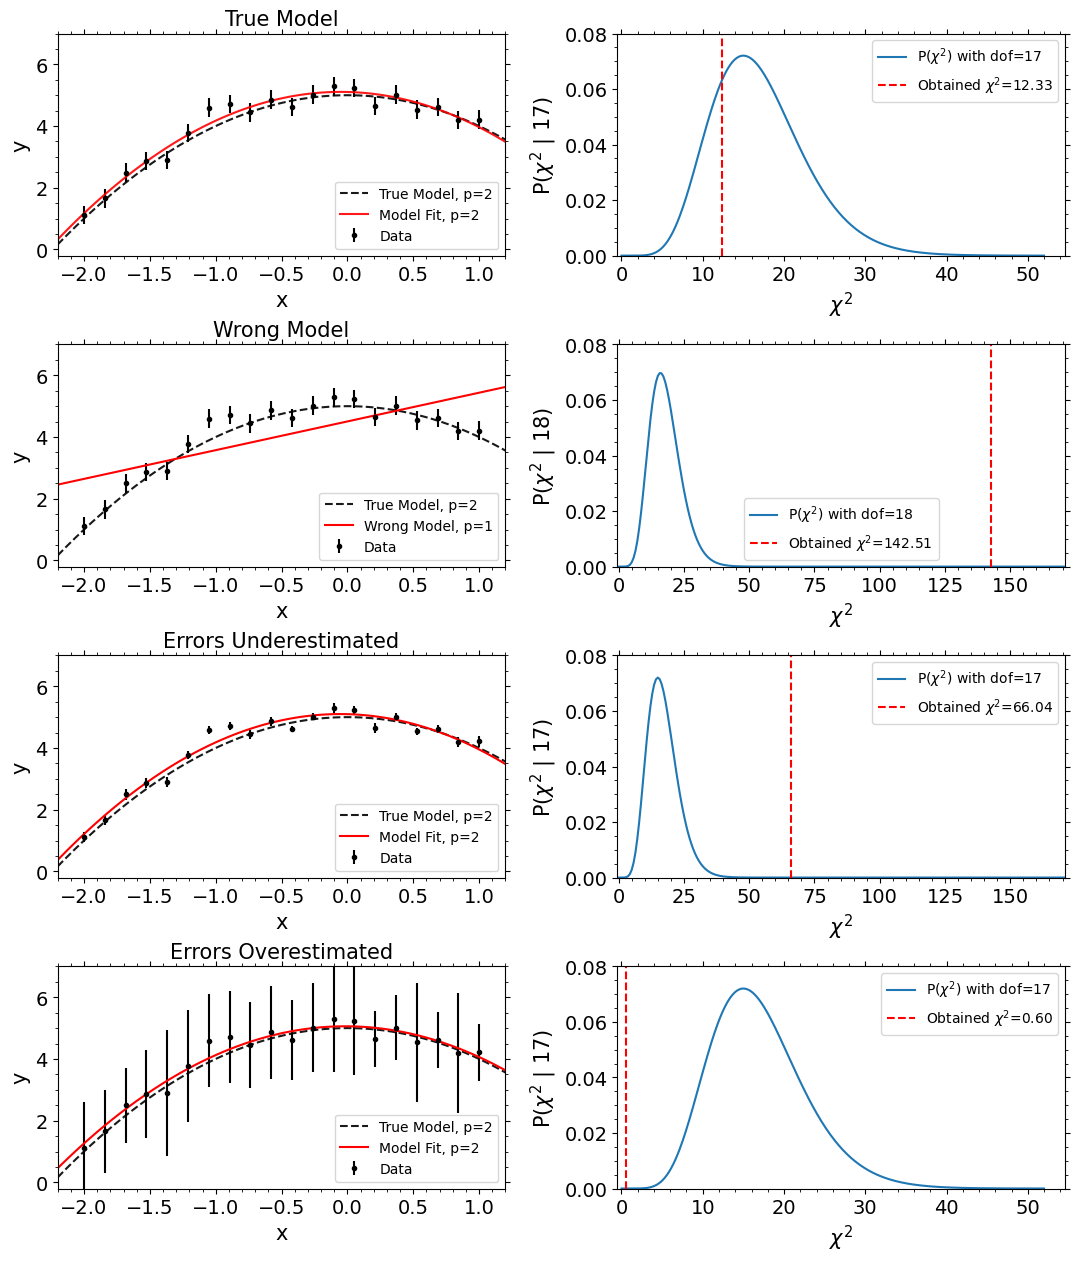

In [12]:
markersize= 3

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(4, 2, figsize=(13, 15))

# Plot for p2
axes[0, 0].errorbar(x, y, yerr=sig_y, fmt='o', color='k', label='Data', markersize=markersize)
axes[0, 0].plot(x_fine, y_true_fine, color='k', linestyle='--', alpha=0.9, linewidth=1.5, label=f'True Model, p={p2}')
axes[0, 0].plot(x_fine, y_p2_fit_fine, color='red', alpha=0.9, label=f'Model Fit, p={p2}')
axes[0, 0].set_title('True Model', fontsize=15)
axes[0, 0].set_xlabel('x', fontsize=15)
axes[0, 0].set_ylabel('y', fontsize=15)
axes[0, 0].legend(loc='lower right')

chi2_values = np.linspace(0, dof_p2 + 6.0*np.sqrt(2.0*dof_p2), 400)
axes[0, 1].plot(chi2_values, stats.chi2.pdf(chi2_values, dof_p2), label=f'P($\chi^2$) with dof={dof_p2}')
axes[0, 1].axvline(chi2_p2, color='r', linestyle='--', label=f'Obtained $\chi^2$={chi2_p2:.2f}')
axes[0, 1].set_xlabel('$\chi^2$', fontsize=15)
axes[0, 1].set_ylabel('P($\chi^2$ | {:d})'.format(dof_p2), fontsize=15)
axes[0, 1].legend()

# Plot for p1, wrong model
axes[1, 0].errorbar(x, y, yerr=sig_y, fmt='o', color='k', label='Data', markersize=markersize)
axes[1, 0].plot(x_fine, y_true_fine, color='k', linestyle='--', alpha=0.9, linewidth=1.5, label=f'True Model, p={p2}')
axes[1, 0].plot(x_fine, y_p1_fit_fine, color='red', label=f'Wrong Model, p={p1}')
axes[1, 0].set_title('Wrong Model', fontsize=15)
axes[1, 0].set_xlabel('x', fontsize=15)
axes[1, 0].set_ylabel('y', fontsize=15)
axes[1, 0].legend(loc='lower right')

chi2_values = np.linspace(0, chi2_p1*2, 400)
axes[1, 1].plot(chi2_values, stats.chi2.pdf(chi2_values, dof_p1), label=f'P($\chi^2$) with dof={dof_p1}')
axes[1, 1].axvline(chi2_p1, color='r', linestyle='--', label=f'Obtained $\chi^2$={chi2_p1:.2f}')
axes[1, 1].set_xlabel('$\chi^2$', fontsize=15)
axes[1, 1].set_ylabel('P($\chi^2$ | {:d})'.format(dof_p1), fontsize=15)
axes[1, 1].legend()
axes[1,1].set_xlim(0, 1.2*chi2_p1)


# Plot for p2 with underestimated errors
axes[2, 0].errorbar(x, y, yerr=sig_y_tosmal, fmt='o', color='k', label='Data', markersize=markersize)
axes[2, 0].plot(x_fine, y_true_fine, color='k', linestyle='--', alpha=0.9, linewidth=1.5, label=f'True Model, p={p2}')
axes[2, 0].plot(x_fine, y_p2_fit_toosmal_fine, color='red', label=f'Model Fit, p={p2}')
axes[2, 0].set_title('Errors Underestimated', fontsize=15)
axes[2, 0].set_xlabel('x', fontsize=15)
axes[2, 0].set_ylabel('y', fontsize=15)
axes[2, 0].legend(loc='lower right')

chi2_values = np.linspace(0, chi2_p1*2, 400)
axes[2, 1].plot(chi2_values, stats.chi2.pdf(chi2_values, dof_p2), label=f'P($\chi^2$) with dof={dof_p2}')
axes[2, 1].axvline(chi2_p2_toosmal, color='r', linestyle='--', label=f'Obtained $\chi^2$={chi2_p2_toosmal:.2f}')
axes[2, 1].set_xlabel('$\chi^2$', fontsize=15)
axes[2, 1].set_ylabel('P($\chi^2$ | {:d})'.format(dof_p2), fontsize=15)
axes[2, 1].legend()
axes[2,1].set_xlim(0, 1.2*chi2_p1)

# Plot for p2 with overestimated errors 
axes[3, 0].errorbar(x, y, yerr=sig_y_tobig, fmt='o', color='k', label='Data', markersize=markersize)
axes[3, 0].plot(x_fine, y_true_fine, color='k', linestyle='--', alpha=0.9, linewidth=1.5, label=f'True Model, p={p2}')
axes[3, 0].plot(x_fine, y_p2_fit_tobig_fine, color='red', label=f'Model Fit, p={p2}')
axes[3, 0].set_title('Errors Overestimated', fontsize=15)
axes[3, 0].set_xlabel('x', fontsize=15)
axes[3, 0].set_ylabel('y', fontsize=15)
axes[3, 0].legend(loc='lower right')

chi2_values = np.linspace(0, dof_p2 + 6.0*np.sqrt(2.0*dof_p2), 400)
axes[3, 1].plot(chi2_values, stats.chi2.pdf(chi2_values, dof_p2), label=f'P($\chi^2$) with dof={dof_p2}')
axes[3, 1].axvline(chi2_p2_toobig, color='r', linestyle='--', label=f'Obtained $\chi^2$={chi2_p2_toobig:.2f}')
axes[3, 1].set_xlabel('$\chi^2$', fontsize=15)
axes[3, 1].set_ylabel('P($\chi^2$ | {:d})'.format(dof_p2), fontsize=15)
axes[3, 1].legend()


ax_0 = axes[:, 0].flatten()
for a in ax_0:
    a.set_xlim(-2.2, 1.2)
    a.set_ylim(-0.2,7.0) 

ax_1 = axes[:, 1].flatten()
for a in ax_1:
    xlim = a.get_xlim()
    a.set_xlim(-0.5, xlim[1])
    a.set_ylim(0.0, 0.08) 

ax_flat = axes.flatten()
for a in ax_flat:
    a.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labelsize=14)
    a.xaxis.set_minor_locator(AutoMinorLocator())
    a.yaxis.set_minor_locator(AutoMinorLocator())

# Adjust the space between subplots
plt.subplots_adjust(wspace=0.25, hspace=0.4)